<a href="https://colab.research.google.com/github/fannijako/ML_course_hw_1/blob/main/ML_2_hf_Fanni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Első MI - neurális hálók házi projekt

készítette: Jakó Fanni

## 1. feladat

Implementáljatok 2 tetszőleges aktivációs függvényt, majd rajzoljátok ki a függvényt megfelelő értelmezési tartományon


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Hyperbolic tangent implementation

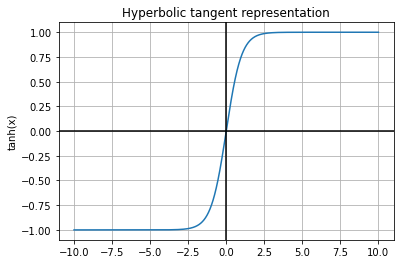

In [ ]:
x = np.linspace(start = -10, stop = 10, num = 10000, endpoint = True)
y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(ylabel='tanh(x)', title='Hyperbolic tangent representation')
ax.grid()

plt.axhline(y = 0, color = 'k', linestyle = '-')
plt.axvline(x = 0, color = 'k', linestyle = '-')

plt.show()

### Sigmoid implementation

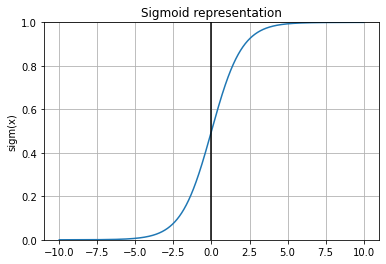

In [ ]:
x = np.linspace(start = -10, stop = 10, num = 10000, endpoint = True)
y = 1 / (1 + np.exp(-x))

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(ylabel='sigm(x)', title='Sigmoid representation', ylim = (0, 1))
ax.grid()

plt.axvline(x = 0, color = 'k', linestyle = '-')

plt.show()

## 2. feladat

Töltsetek le egy tetszőleges datasetet és alkalmazzatok DNN-t regressziós problémára

dataset: diabetes - kaggle

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
dataframe = pd.read_csv("diabetes.csv")

In [ ]:
dataframe.shape

(768, 9)

In [ ]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataframe.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
y_df = dataframe.Outcome

In [ ]:
y_df.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
x_df = dataframe.copy().drop('Outcome', axis = 1)

In [ ]:
x_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.1, shuffle = True)

In [ ]:
x_train.shape

(691, 8)

In [ ]:
x_test.shape

(77, 8)

In [ ]:
y_test.shape

(77,)

In [ ]:
x_test.shape[0] == y_test.shape[0]

True

Normalizálás

In [ ]:
normalizer = StandardScaler()
normalizer.fit(x_train)
x_train = normalizer.transform(x_train)
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7
0,2.142738,1.085315,0.355542,0.485603,0.608799,0.177117,2.720220,1.484160
1,-0.861182,-1.016799,-2.009728,1.357975,0.170814,2.963913,0.085822,-0.621356
2,-0.260398,-0.232428,-1.289863,-0.449081,-0.679391,-1.222702,-1.008514,-0.958238
3,1.842346,-0.828550,0.149866,-0.137520,-0.679391,-1.132805,0.390146,1.905263
4,0.039994,0.740192,0.664055,0.734852,-0.679391,0.844921,0.264113,0.305071
...,...,...,...,...,...,...,...,...
686,-0.260398,-1.330547,0.047029,-1.259141,-0.679391,0.074378,-0.608897,0.473513
687,-0.560790,0.049945,-0.467160,-0.137520,0.230930,-0.272366,0.765171,-0.958238
688,0.640778,-1.048173,0.561218,-1.259141,-0.679391,-1.119963,-1.180656,-0.116032
689,-0.861182,-1.173673,-0.055809,-1.259141,-0.679391,-1.762082,0.479291,-0.537135


In [ ]:
normalizer = StandardScaler()
normalizer.fit(x_test)
x_test = normalizer.transform(x_test)
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7
0,2.535148,0.827175,1.127365,0.650023,-0.554179,-0.675752,0.596168,1.043819
1,-0.176052,-0.441106,-0.614219,0.513270,-0.408309,-0.363138,-0.201142,-0.951282
2,2.806268,-0.781377,0.474271,0.103009,0.953143,0.458922,-0.248822,1.328834
3,-0.718292,2.188257,0.365422,0.855153,1.585245,0.447344,0.977606,-0.286248
4,-0.718292,-0.008035,-1.049615,1.128660,0.787823,0.076838,1.208058,-0.381253
...,...,...,...,...,...,...,...,...
72,-0.989412,-0.750443,0.365422,-1.606410,-0.836194,0.354717,-0.815681,-0.571263
73,-0.718292,-0.905111,2.868949,-1.606410,-0.836194,-1.185197,-0.791841,-0.476258
74,-0.176052,1.012777,0.038875,0.444893,2.353493,0.331561,-0.428945,0.283781
75,-0.989412,0.270368,-0.614219,-0.238875,1.993681,-0.722065,-0.407754,-1.046287


Architektúra

In [ ]:
from tensorflow.keras.layers import Input, Dense
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import BinaryAccuracy

In [35]:
input = Input(shape=(x_train.shape[1]))
x = Dense(8, activation = 'relu')(input)
x = Dense(16, activation = 'relu')(x)
x = Dense(8, activation = 'relu')(x)
x = Dense(4, activation = 'relu')(x)
output = Dense(1, activation = 'sigmoid')(x)
model = keras.Model(input, output)

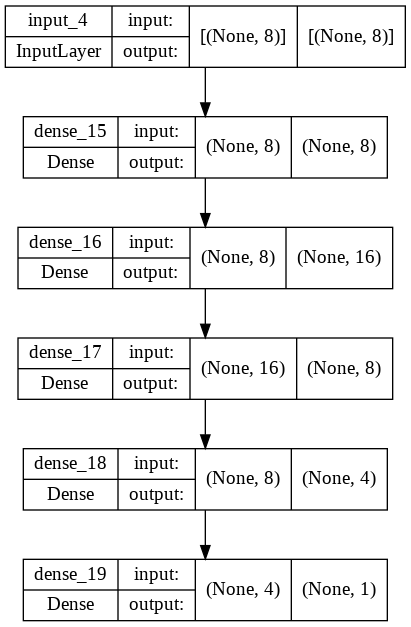

In [36]:
plot_model(model, show_shapes=True)

In [37]:
model.compile(loss = 'binary_crossentropy', metrics = [BinaryAccuracy()])

In [38]:
model.fit(x = x_train, y = y_train, epochs = 50)

Epoch 1/50
22/22 [==============================] - 1s 2ms/step - loss: 0.6888 - binary_accuracy: 0.5847
Epoch 2/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6588 - binary_accuracy: 0.6541
Epoch 3/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6309 - binary_accuracy: 0.6599
Epoch 4/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6065 - binary_accuracy: 0.6585
Epoch 5/50
22/22 [==============================] - 0s 2ms/step - loss: 0.5835 - binary_accuracy: 0.6585
Epoch 6/50
22/22 [==============================] - 0s 2ms/step - loss: 0.5640 - binary_accuracy: 0.6585
Epoch 7/50
22/22 [==============================] - 0s 2ms/step - loss: 0.5505 - binary_accuracy: 0.6585
Epoch 8/50
22/22 [==============================] - 0s 2ms/step - loss: 0.5404 - binary_accuracy: 0.6570
Epoch 9/50
22/22 [==============================] - 0s 2ms/step - loss: 0.5330 - binary_accuracy: 0.6585
Epoch 10/50
22/22 [==============================] - 0s

In [39]:
model.evaluate(x = x_test, y = y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.5161 - binary_accuracy: 0.7143


[0.5160796046257019, 0.7142857313156128]